In [50]:
import math

In [51]:
 def dist(row):
    llat1 = row['pickup_latitude']
    llong1 = row['pickup_longitude']
    llat2 = row['pickup_latitude']
    llong2 = row['dropoff_longitude']  

    #(llat1,llong1,llat2,llong2):
    #pi - число pi, rad - радиус сферы (Земли)
    rad = 6372795
 
    #координаты двух точек
    #llat1 = 77.1539
    #llong1 = -120.398
 
    #llat2 = 77.1804
    #llong2 = 129.55
 
    #в радианах
    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.
 
    #косинусы и синусы широт и разницы долгот
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)
 
    #вычисления длины большого круга
    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
    dist = ad*rad
 
    #вычисление начального азимута
    x = (cl1*sl2) - (sl1*cl2*cdelta)
    y = sdelta*cl2
    z = math.degrees(math.atan(-y/x))
 
    if (x < 0):
        z = z+180.
 
    z2 = (z+180.) % 360. - 180.
    z2 = - math.radians(z2)
    anglerad2 = z2 - ((2*math.pi)*math.floor((z2/(2*math.pi))) )
    angledeg = (anglerad2*180.)/math.pi
 
    #print 'Distance >> %.0f' % dist, ' [meters]'
    #print 'Initial bearing >> ', angledeg, '[degrees]'
    return dist

In [52]:
#! dir

In [53]:
%%time
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
Wall time: 214 ms


In [54]:
path1 = r'C:\Users\Safonov\Downloads\11AA\Source\1.3\IMDB' + '//'

In [55]:
FName11 = 'tmdb_5000_credits.csv'

In [56]:
FName12 = 'tmdb_5000_movies.csv'

In [57]:
full_patch1 = path1 + FName12

In [58]:
path2 = r'C:\Users\Safonov\Downloads\11AA\Source\1.3\NBA' + '//'

In [59]:
FName21 = 'Players.csv'

In [60]:
FName22 = 'Seasons_Stats.csv'

In [61]:
full_patch2 = path2 + FName22

In [62]:
path3 = r'C:\Users\Safonov\Downloads\11AA\Source\1.3\NYC' + '//'

In [63]:
FName3 = 'train.csv'

In [64]:
full_patch3 = path3 + FName3

In [65]:
%%time
df = pd.read_csv(full_patch3) #, dtype={'pickup_datetime': float64,'dropoff_datetime': float64})
print(df.shape)

(1458644, 11)
Wall time: 9.52 s


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [67]:
# df.head()

In [68]:
#df.trip_duration.value_counts()

In [69]:
%%time
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

#datetime.datetime.strptime(df.pickup_datetime,  '%Y-%m-%d %H:%M:%S') #'g'#df.dropoff_datetime - df.pickup_datetime

Wall time: 1.42 s


In [70]:
%%time
df['trip_time'] = df.dropoff_datetime - df.pickup_datetime

Wall time: 264 ms


In [71]:
%%time
#df['trip_time_sec'] = df["trip_time"].apply(lambda x: x.seconds) # df.trip_time.seconds

Wall time: 0 ns


In [72]:
%%time
#df['pickup_long_rad'] = df['pickup_longitude'].apply(lambda x: x*math.pi/180)
#df['pickup_lat_rad'] = df['pickup_latitude'].apply(lambda x: x*math.pi/180)
#df['dropoff_long_rad'] = df['dropoff_longitude'].apply(lambda x: x*math.pi/180)
#df['dropoff_lat_rad'] = df['dropoff_latitude'].apply(lambda x: x*math.pi/180)
#df[''] =ABS(K5-K4)*ABS(COS(МИН(ABS(J4);ABS(J5))))

Wall time: 0 ns


In [73]:
def dist1(row):
    llat1 = row['pickup_latitude']
    llong1 = row['pickup_longitude']
    llat2 = row['pickup_latitude']
    llong2 = row['dropoff_longitude'] 
    #pi - число pi, rad - радиус сферы (Земли)
    rad = 6372795
    
    #в радианах
    lat1 = llat1*math.pi/180
    lat2 = llat2*math.pi/180
    long1 = llong1*math.pi/180
    long2 = llong2*math.pi/180   

    #косинусы и синусы широт и разницы долгот
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta) 
    
    #вычисления длины большого круга
    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
    dist = ad*rad    
    
    к = round(dist)
    return к

In [74]:
%%time
df['dist'] = df.apply( dist1, axis = 1 )
#df['av_speed'] =df['dist'] / df['trip_duration']

Wall time: 3min 33s


In [75]:
%%time
df['av_speed'] = df['dist'] / df['trip_duration']

Wall time: 24 ms


In [97]:
useful_cols = ['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'store_and_fwd_flag', 
               'trip_duration', 'trip_time', 'dist', 'av_speed'
              ]
df[useful_cols].sort_values( by = 'trip_time', ascending = False ).head(10)
#df.sort_values( by = 'trip_time', ascending = False ).head(10)
#df.head(10)

,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,trip_time,dist,av_speed
978383,2016-02-13 22:46:52,2016-03-25 18:18:14,1,N,3526282,40 days 19:31:22,16402,0.004651
924150,2016-01-05 06:14:15,2016-01-31 01:01:07,1,N,2227612,25 days 18:46:52,143,0.000064
680594,2016-02-13 22:38:00,2016-03-08 15:57:38,2,N,2049578,23 days 17:19:38,5316,0.002594
355003,2016-01-05 00:19:42,2016-01-27 11:08:38,1,N,1939736,22 days 10:48:56,14108,0.007273
1234291,2016-02-15 23:18:06,2016-02-16 23:17:58,2,N,86392,0 days 23:59:52,16586,0.191985
295382,2016-05-31 13:00:39,2016-06-01 13:00:30,1,N,86391,0 days 23:59:51,17885,0.207024
73816,2016-05-06 00:00:10,2016-05-07 00:00:00,1,N,86390,0 days 23:59:50,1431,0.016564
59891,2016-06-30 16:37:52,2016-07-01 16:37:39,1,N,86387,0 days 23:59:47,2507,0.029021
1360439,2016-06-23 16:01:45,2016-06-24 16:01:30,1,N,86385,0 days 23:59:45,17126,0.198252
753765,2016-05-17 22:22:56,2016-05-18 22:22:35,4,N,86379,0 days 23:59:39,3987,0.046157


In [78]:
df.pickup_datetime.max()

Timestamp('2016-06-30 23:59:39')

In [79]:
df.pickup_datetime.min()

Timestamp('2016-01-01 00:00:17')

In [83]:
df.trip_durationuration.max()

3526282

In [86]:
df.trip_duration.min()

1

In [87]:
df.trip_duration.mean()

959.4922729603659

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000026BF8ABEF0>]], dtype=object)

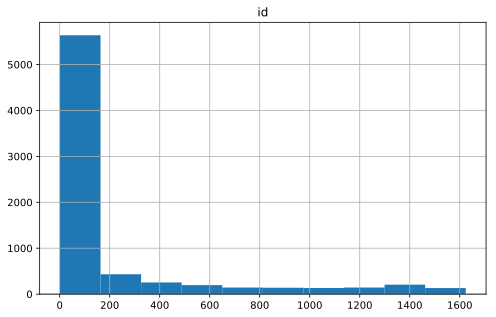

In [92]:
df1 = df.groupby('trip_time')[['id']].count()
df1.hist()

In [93]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
# import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Wall time: 328 ms


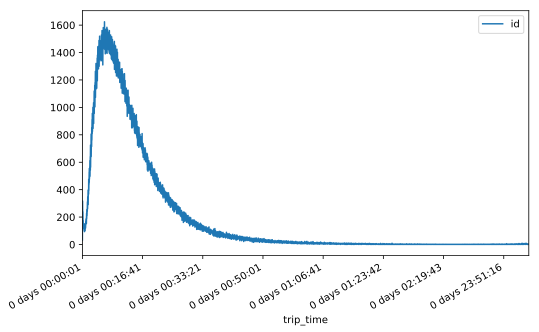

In [94]:
%%time
df1.plot();
#%config InlineBackend.figure_format = 'png' 
#sns_plot = sns.pairplot(
#    df[['trip_duration', 'dist', 'pickup_datetime']]);
#sns_plot.savefig('pairplot.png')

In [95]:
df.trip_time.value_counts().head()

00:06:08    1624
00:06:48    1584
00:05:48    1582
00:06:07    1581
00:05:58    1577
Name: trip_time, dtype: int64